
# Food Delivery Time Prediction Using Linear Regression





## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Q1. Load the dataset and display the first five rows

In [ ]:
df = pd.read_csv('/Delivery_Food.csv')


In [ ]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


## Q2. Total number of records and features

In [ ]:
df.shape

(1000, 9)

## Q3. Identify numerical, categorical and target variables

In [ ]:
df.dtypes

,0
Order_ID,int64
Distance_km,float64
Weather,object
Traffic_Level,object
Time_of_Day,object
Vehicle_Type,object
Preparation_Time_min,int64
Courier_Experience_yrs,float64
Delivery_Time_min,int64


## Q4. Check for missing values in all columns

In [ ]:
df.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


## Q5. Handle missing values in Time_of_Day using mode

In [ ]:
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
df['Time_of_Day'].isna().sum()

np.int64(0)

## Q6. Remove Order_ID column

In [ ]:
df = df.drop(columns=['Order_ID'])
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


## Q7. One-Hot Encode categorical columns for modeling

In [ ]:
data = df.copy()
data['Weather'] = data['Weather'].fillna(data['Weather'].mode()[0])
data['Traffic_Level'] = data['Traffic_Level'].fillna(data['Traffic_Level'].mode()[0])
data['Courier_Experience_yrs'] = data['Courier_Experience_yrs'].fillna(data['Courier_Experience_yrs'].median())
cat_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
data_enc = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data_enc.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False


## Q8. Explanation of categorical to numerical conversion

Linear Regression requires numerical input; categorical data must be encoded into binary columns so that mathematical operations can be applied.

## Q9. New total number of input features after encoding

In [ ]:
data_enc.shape, data_enc.columns

((1000, 15),
 Index(['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs',
        'Delivery_Time_min', 'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy',
        'Weather_Windy', 'Traffic_Level_Low', 'Traffic_Level_Medium',
        'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
        'Vehicle_Type_Car', 'Vehicle_Type_Scooter'],
       dtype='object'))

## Q10. Define feature matrix X and target vector y

In [ ]:
X = data_enc.drop(columns=['Delivery_Time_min'])
y = data_enc['Delivery_Time_min']
X.shape, y.shape

((1000, 14), (1000,))

## Q11. Train a Linear Regression model

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

## Q12. Regression equation: intercept and coefficients

In [ ]:
intercept = model.intercept_
coefficients = pd.Series(model.coef_, index=X.columns)
intercept, coefficients

(np.float64(17.62181178856288),
 Distance_km                2.991081
 Preparation_Time_min       0.966878
 Courier_Experience_yrs    -0.659126
 Weather_Foggy              7.352224
 Weather_Rainy              4.843582
 Weather_Snowy              9.304308
 Weather_Windy              1.940991
 Traffic_Level_Low        -11.932655
 Traffic_Level_Medium      -6.188154
 Time_of_Day_Evening        0.856347
 Time_of_Day_Morning       -0.193436
 Time_of_Day_Night         -0.710142
 Vehicle_Type_Car           0.508496
 Vehicle_Type_Scooter      -0.867977
 dtype: float64)

## Q13. Predict the delivery time for all input records

In [ ]:
y_pred = model.predict(X)
y_pred[:10]

array([41.4248547 , 79.42286533, 66.35181796, 41.83816965, 74.59041024,
       65.50738577, 44.91422335, 64.31655775, 37.0652407 , 72.17537431])

## Q14. Add Predicted_Delivery_Time to the dataset

In [ ]:
data_enc['Predicted_Delivery_Time'] = y_pred
data_enc.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter,Predicted_Delivery_Time
0,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True,41.424855
1,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False,79.422865
2,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True,66.351818
3,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True,41.838170
4,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False,74.590410


## Q15. Compute residuals (Actual − Predicted)

In [ ]:
data_enc['Residual'] = data_enc['Delivery_Time_min'] - data_enc['Predicted_Delivery_Time']
data_enc[['Delivery_Time_min', 'Predicted_Delivery_Time', 'Residual']].head()

,Delivery_Time_min,Predicted_Delivery_Time,Residual
0,43,41.424855,1.575145
1,84,79.422865,4.577135
2,59,66.351818,-7.351818
3,37,41.838170,-4.838170
4,68,74.590410,-6.590410


## Q16. Calculate Mean Absolute Error (MAE)

In [ ]:
mae = mean_absolute_error(y, y_pred)
mae

6.445467636192244

## Q17. Calculate Mean Squared Error (MSE)

In [ ]:
mse = mean_squared_error(y, y_pred)
mse

109.1749010814338

## Q18. Calculate R² Score and interpretation

In [ ]:
r2 = r2_score(y, y_pred)
r2

0.7756548777598702

## Q19. Top three features based on absolute coefficient values

In [ ]:
coef_abs = coefficients.abs().sort_values(ascending=False)
coef_abs.head(3)

,0
Traffic_Level_Low,11.932655
Weather_Snowy,9.304308
Weather_Foggy,7.352224


## Q20. Business recommendations

1. Optimize routes during heavy traffic.  
2. Increase courier availability during bad weather.  
3. Reduce restaurant preparation time by improving workflow.

## Section B: Visualization

## Q21. Histogram of Distance_km

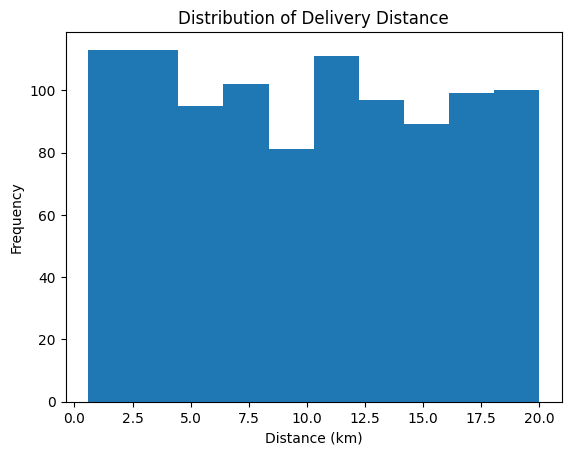

In [ ]:
plt.hist(df['Distance_km'], bins=10)
plt.title("Distribution of Delivery Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.show()

## Q22. Histogram of Preparation_Time_min

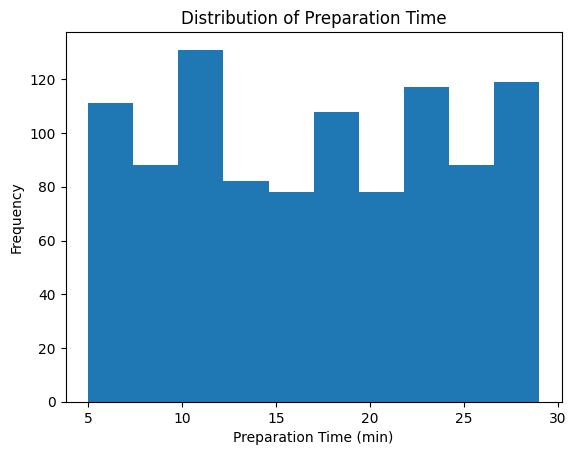

In [ ]:
plt.hist(df['Preparation_Time_min'], bins=10)
plt.title("Distribution of Preparation Time")
plt.xlabel("Preparation Time (min)")
plt.ylabel("Frequency")
plt.show()

## Q23. Bar chart of average Delivery_Time_min for each Traffic_Level

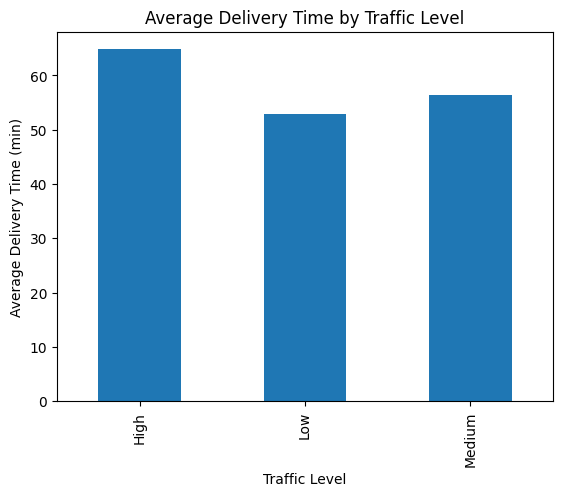

In [ ]:
avg_by_traffic = data.groupby('Traffic_Level')['Delivery_Time_min'].mean()
avg_by_traffic.plot(kind='bar', title="Average Delivery Time by Traffic Level")
plt.xlabel("Traffic Level")
plt.ylabel("Average Delivery Time (min)")
plt.show()

## Q24. Bar chart of average Delivery_Time_min for each Weather condition

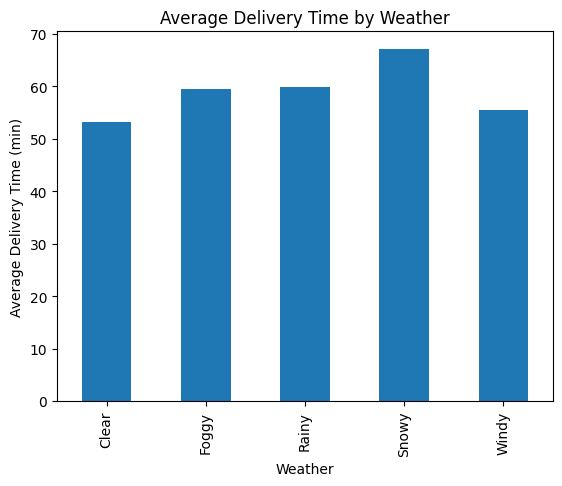

In [ ]:
avg_by_weather = data.groupby('Weather')['Delivery_Time_min'].mean()
avg_by_weather.plot(kind='bar', title="Average Delivery Time by Weather")
plt.xlabel("Weather")
plt.ylabel("Average Delivery Time (min)")
plt.show()

## Q25. Bar chart of average Delivery_Time_min for each Vehicle_Type

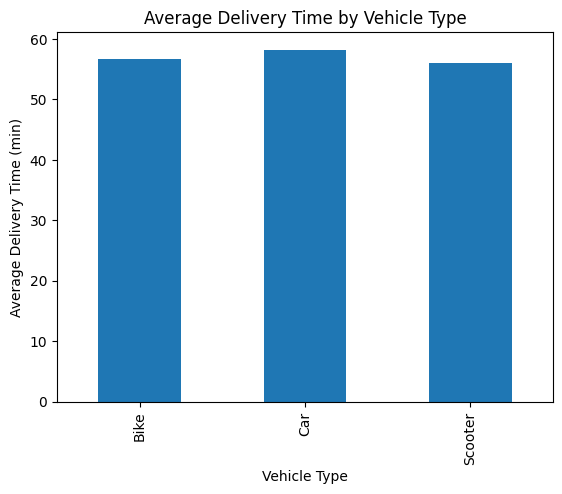

In [ ]:
avg_by_vehicle = data.groupby('Vehicle_Type')['Delivery_Time_min'].mean()
avg_by_vehicle.plot(kind='bar', title="Average Delivery Time by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Delivery Time (min)")
plt.show()

## Q26. Scatter plot of Distance_km versus Delivery_Time_min

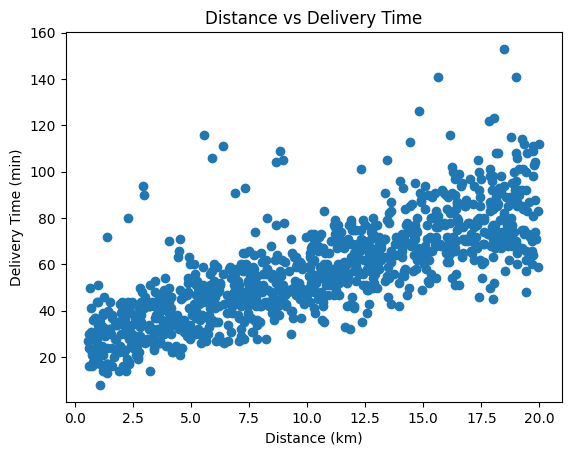

In [ ]:
plt.scatter(data['Distance_km'], data['Delivery_Time_min'])
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.show()

## Q27. Scatter plot of Courier_Experience_yrs versus Delivery_Time_min

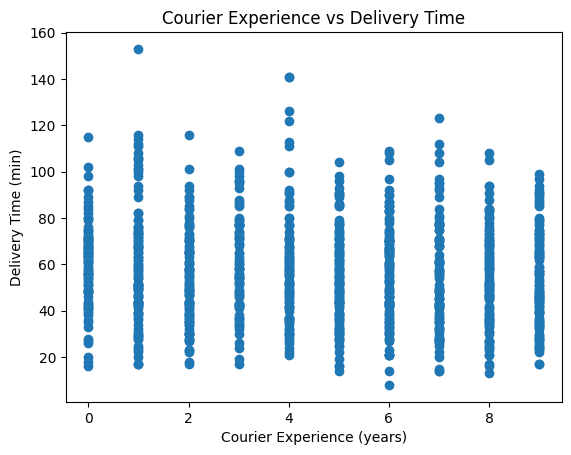

In [ ]:
plt.scatter(data['Courier_Experience_yrs'], data['Delivery_Time_min'])
plt.title("Courier Experience vs Delivery Time")
plt.xlabel("Courier Experience (years)")
plt.ylabel("Delivery Time (min)")
plt.show()

## Q28. Boxplot of Delivery_Time_min grouped by Time_of_Day

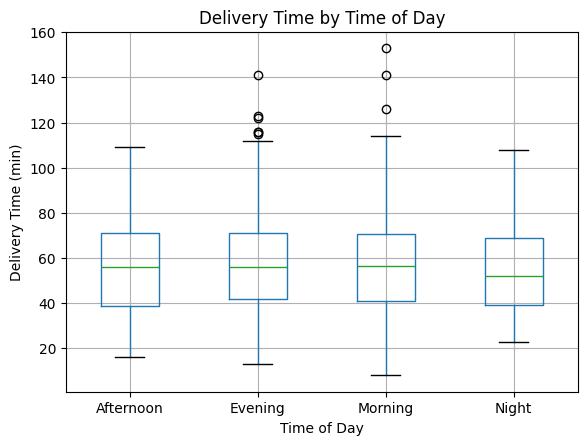

In [ ]:
data.boxplot(column='Delivery_Time_min', by='Time_of_Day')
plt.title("Delivery Time by Time of Day")
plt.suptitle("")
plt.xlabel("Time of Day")
plt.ylabel("Delivery Time (min)")
plt.show()

## Q29. Scatter plot of Actual vs Predicted Delivery Time

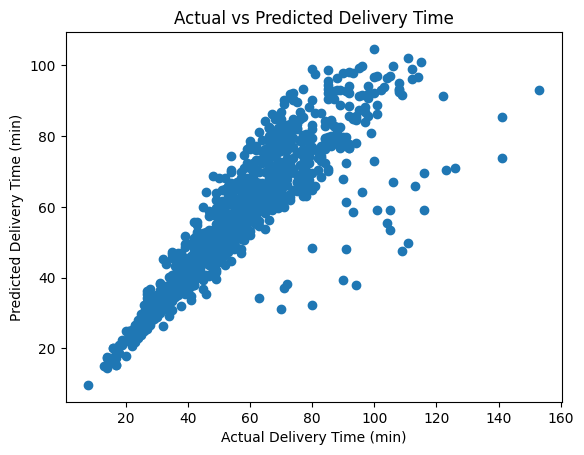

In [ ]:
plt.scatter(data_enc['Delivery_Time_min'], data_enc['Predicted_Delivery_Time'])
plt.title("Actual vs Predicted Delivery Time")
plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.show()

## Q30. Plot residuals against predicted values

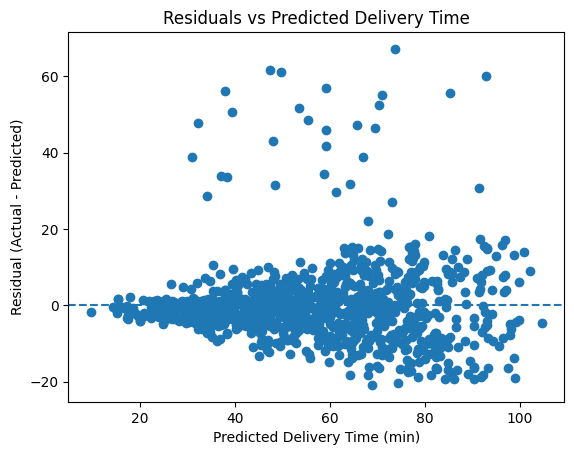

In [ ]:
plt.scatter(data_enc['Predicted_Delivery_Time'], data_enc['Residual'])
plt.axhline(y=0, linestyle='--')
plt.title("Residuals vs Predicted Delivery Time")
plt.xlabel("Predicted Delivery Time (min)")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()